# MECD 09 - Computer Vision <small>   <br>  MASTER IN DATA SCIENCE AND ENGINEERING </small>



**Professor:** Andry Maykol Pinto<br>
**Students:** Fabiana Silva | Gabriel Carvalhal | Guilherme Salles <br>


## Assigment 1

The quality assurance tester of a M&M factory retrieves a sample from the production every hour to determine some properties of chocolate peanuts. The factory uses a computer vision application to automatically calculate some properties of the sample, namely:<br>

 - the distribution of each color in the sample, e.g., the number of red (or blue, etc) chocolates. At the end, if the sample does not have chocolate peanuts of all colors, the system must raise an alarm by printing “Color XPTO is missing”.<br>
 
- the average shape area of all chocolate peanuts in millimeters and organized by color.<br>
Considering these requirements:


a) Calibrate the intrinsic parameters and lens distortion of the camera.

b) Calibrate the extrinsic parameters of the camera setup (or instead, use the extrinsic image to manually measure the dimensions of a black square of the chessboard in pixels. In this way, you will know the
conversion between pixel to millimeter).

c) Consider only the images retrieved from a White Background.
Implement the functions described above.<br>

I.Define a ROI (region of interest);<br>
II.Calculate the color distribution (up to 4);<br>
III. Determine the shape area for the chocolate peanuts in pixels; <br>
IV. Determine the shape area for chocolate peanuts in millimeters and group by color;<br>
V. Show a histogram of the shape areas of the chocolate peanuts for the entire sample;<br>
VI. Provide some recommendations that the M&M factory should take into consideration to improve the performance of the quality assurance process based on image processing (e.g., imaging setup, calibration process and photometric effects).

### Index:

* [a. Intrinsic parameters calibration](#sec1)


* [b. Extrinsic parameters calibration](#sec2)


* [c. More functions:](#sec3)
* [I. ROI](#sec4)
* [II. Color Distribution](#sec5)
* [III. Shape of Area in Pixels](#sec6)
* [IV. Shape of Area in milimeters and group by color](#sec7)
* [V. Histogram of the Areas for entire sample](#sec8)
* [VI. Recommendations](#sec9)

In [1]:
import numpy as np
import pandas as pd
import cv2 # for image display since cv2.imshow crashes the Colab
from PIL import Image 
import matplotlib.pylab as plt
import time
import glob

/Users/guilhermesalles/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def display(img,m_img, cmap="gray"):
    img = img[:, :, ::-1]
    m_img = m_img[:, :, ::-1]
    
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(img,cmap="gray")
    axs[1].imshow(m_img,cmap="gray")
    axs[1].set_title("Transformed picture")
    #axs[1].set_title("Total count={}".format(count))

## a. Intrinsic parameters calibration <a class="anchor" id="sec1"></a>

### Camera calibration

In [3]:
#Define the dimensions of checkerboard
CHECKERBOARD = (7, 4)
 
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# Vector for 3D points
threedpoints = []
 
# Vector for 2D points
twodpoints = []
 
#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
 
# Extracting path of individual image stored in a given directory. 
images = glob.glob('./IntrinsicCalibration/*.png')
 
for filename in images:
    image = cv2.imread(filename)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
    # Find the chess board corners. If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(grayColor, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
 
    # If desired number of corners can be detected then, refine the pixel coordinates and display them on the images of checker board
    if ret == True:
        threedpoints.append(objectp3d)
 
        # Refining pixel coordinates for given 2D points
        corners2 = cv2.cornerSubPix(grayColor, corners, (11, 11), (-1, -1), criteria)
 
        twodpoints.append(corners2)
 
        # Draw and display the corners
        image = cv2.drawChessboardCorners(image, CHECKERBOARD, corners2, ret)
        

In [4]:
# Perform camera calibration by passing the value of above found out 3D points (threedpoints)
# and its corresponding pixel coordinates of the detected corners (twodpoints)
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera( threedpoints, twodpoints, grayColor.shape[::-1], None, None)

### Undistortion image

In [5]:
img = cv2.imread("WhiteBackground/calib_img 3.png")

h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(matrix, distortion, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, matrix, distortion, None, newcameramtx)

# crop the image
x, y, w, h = roi
img_udst = dst[y:y+h, x:x+w]

#cv.imwrite('calibresult.png', dst)

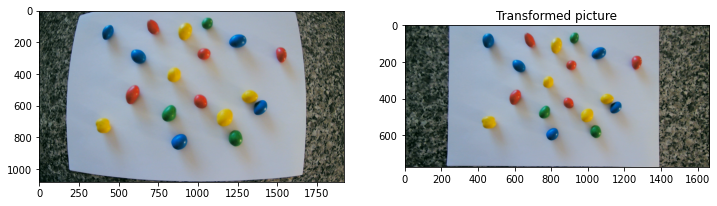

In [6]:
display(img,img_udst)

## b. Extrinsic parameters calibration <a class="anchor" id="sec2"></a>

## c. More functions <a class="anchor" id="sec3"></a>

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import imutils


In [8]:
# Read in image
img_std = img_udst.copy()

## Support function for image processing


In [9]:
def process_img(frame):
    
    # BlueGreenRed Blurred 
    blurred = cv2.GaussianBlur(frame, (11, 11), 0)
    #img_blur = cv2.GaussianBlur(img,(3,3), SigmaX=0, SigmaY=0)
    
    #Edge detection
    #edges = cv2.Canny(image=blurred, threshold1=50, threshold2=200)
    #plt.imshow(edges)
    #cv2.imwrite("Img_edges.png",edges)
    
    #image = cv2.imread(filename)
    img_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    
    # Split the image into the B,G,R components
    h,s,v = cv2.split(img_hsv)
    #plt.imshow(s)
    
    # Green color
    low_green = np.array([45, 80, 50])   
    high_green = np.array([75, 255, 255])
 
    # Red color
    lower_red = np.array([0,100,100])
    upper_red = np.array([10,255,255])
    
    lower_red2 = np.array([160,100,100])
    upper_red2 = np.array([179,255,255])
    
    # Blue color
    low_blue = np.array([80, 100, 50])
    high_blue = np.array([140, 255, 255])
   
    # Yellow color
    low_yellow = np.array([20, 100, 100]) #24,100,100
    high_yellow = np.array([30, 255, 255])
    
    mask_green = cv2.inRange(img_hsv, low_green, high_green)
    mask_red1 = cv2.inRange(img_hsv, lower_red, upper_red)
    mask_red2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
    mask_blue = cv2.inRange(img_hsv, low_blue, high_blue)
    mask_yellow = cv2.inRange(img_hsv, low_yellow, high_yellow)

    full_mask = mask_green + mask_red1 +mask_red2 + mask_blue + mask_yellow;

    #img_rgb = cv2.erode(img_rgb, None, iterations=2)
    #img_rgb = cv2.dilate(img_rgb, None, iterations=2)
    
    #Apply mask
    #result = cv2.bitwise_and(img_rgb, img_rgb, mask=full_mask)
    result = cv2.bitwise_and(img_rgb, img_rgb, mask=full_mask)

    #Convert again to RGB to looks nice in the output
    result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    
    #mask = cv2.inRange(hsv, lower_blue, upper_blue)


    # Thresold image   #60,255
    thresh = cv2.threshold(result, 90, 255, cv2.THRESH_BINARY)[1]  # gradiente de detecao - 0 ou 1    
    
    result2 = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    #adap_mean_2 = cv2.adaptiveThreshold(result2, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 7, 2)
    #adap_mean_8 = cv2.adaptiveThreshold(result2, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 7, 8)
    #adap_gaussian_8 = cv2.adaptiveThreshold(result2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 7, 8)
    thresh2 = cv2.adaptiveThreshold(result2, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
   
    
    return frame,result,thresh2

In [87]:
def adjust_mms(img_in):
    
    img=img_in.copy()
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,binary = cv2.threshold(gray_image,30,255,cv2.THRESH_BINARY)
    #binary= cv2.adaptiveThreshold(gray_image, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
    
    contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours 
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    #plt.imshow(gray_image)
    
    # Draw the contour 
    img_copy = img_in.copy()
   
    #plt.imshow(img_copy)
    #img_copy[:,:,:]=255
    for c in contours:
        if (cv2.contourArea(c) > 30):
            
            # calculate moments for each contour
            M = cv2.moments(c)
            
            
            # calculate x,y coordinate of center
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                
                #print(cX,cY)
            # Calculate border/extreme points
                l_m = tuple(c[c[:, :, 0].argmin()][0])
                r_m = tuple(c[c[:, :, 0].argmax()][0])
                t_m = tuple(c[c[:, :, 1].argmin()][0])
                b_m = tuple(c[c[:, :, 1].argmax()][0])
                pst = [l_m, r_m, t_m, b_m]
                xcor = [p[0] for p in pst]
                ycor = [p[1] for p in pst]
          
                #Pick color
                #b = img_in[cY,cX,0]
                #g = img_in[cY,cX,1]
                #r = img_in[cY,cX,2]
                
                (b, g, r) = img_in[cY, cX]
       
            
            
                #Paint the shapes
                hull = cv2.convexHull(c)
                img_hull = cv2.drawContours(img_copy, contours = [hull], contourIdx = 0,  color = (255,255,255), thickness = -1)
#(255, 255, 255
            else:
                cX, cY = 0, 0  
    
    #plt.imshow(img_copy)
    #print("Number of Contours found = " + str(len(contours)))
    #print(f"Number of M&M found: {i}")
    return img_copy

In [97]:
def count_mms(img_in,img_cropped):
    
    img=img_in.copy()
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,binary = cv2.threshold(gray_image,30,255,cv2.THRESH_BINARY)
    
    contours,hierarchy = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours 
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    #plt.imshow(gray_image)
    
    # Draw the contour 

    i=0
    img[:,:,:]=255
    for c in contours:
        if (cv2.contourArea(c) > 50):
            i=i+1
     
            M = cv2.moments(c)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                
                (b, g, r) = img_cropped[cY, cX]
                hull = cv2.convexHull(c)
                img_hull = cv2.drawContours(img, contours = [hull], contourIdx = 0,  color = (int(b),int(g),int(r)), thickness = -1)
    
    #plt.imshow(img_copy)
    
    #gray_image = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
   # ret,binary = cv2.threshold(gray_image,30,255,cv2.THRESH_BINARY)

    #result_t = cv2.bitwise_nor(img_in, img_in, mask=binary)
    
    print(f"Number of M&M found: {i}")
    return img #,result_t

## I. Region of Interest <a class="anchor" id="sec4"></a>

In [98]:
# Defined the Region of Interest
cropped_image = img_std[10:950, 300:1200]

In [99]:
img_original, img_r,img_t = process_img(cropped_image)

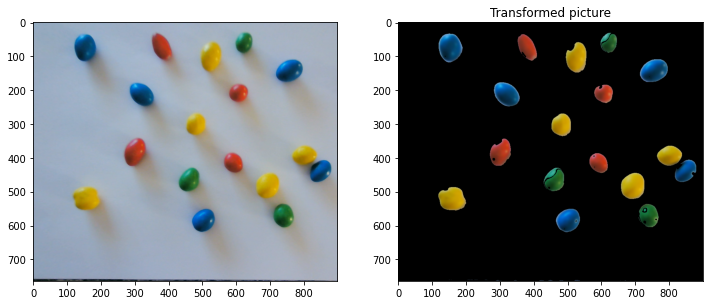

In [100]:
display(cropped_image,img_r)

In [101]:
img_mask_w = adjust_mms(img_r)

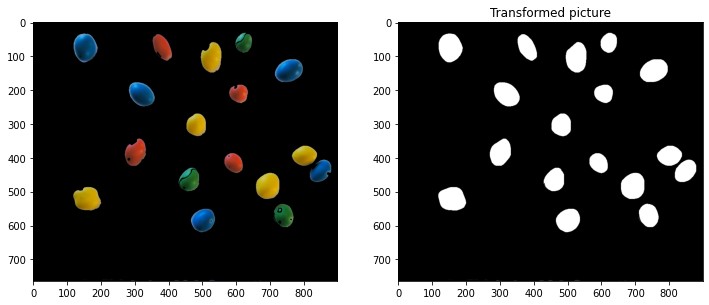

In [102]:
display(img_r,img_mask_w)

## II.Color distribution <a class="anchor" id="sec5"></a>

In [103]:
img_final = count_mms(img_mask_w,cropped_image)

Number of M&M found: 17


In [104]:
img_final2 = count_mms(img_mask_w,img_final)

Number of M&M found: 17


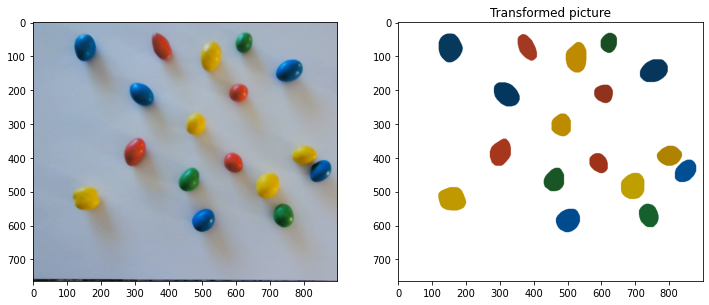

In [105]:
display(cropped_image,img_final)

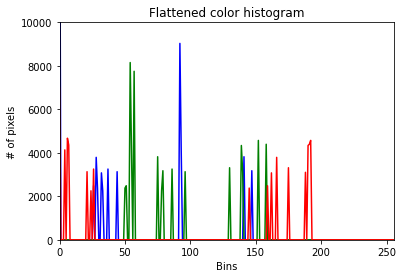

In [106]:
channels = cv2.split(img_final)
colors = 'b', 'g', 'r'

plt.figure()
plt.title('Flattened color histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

for (chan, color) in zip(channels, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 10000])


In [107]:
from sklearn.cluster import KMeans

def visualize_Dominant_colors(cluster, C_centroids):
    C_labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (C_hist, _) = np.histogram(cluster.labels_, bins = C_labels)
    C_hist = C_hist.astype("float")
    C_hist /= C_hist.sum()

    rect_color = np.zeros((50, 300, 3), dtype=np.uint8)
    img_colors = sorted([(percent, color) for (percent, color) in zip(C_hist, C_centroids)])
    start = 0
    for (percent, color) in img_colors:
            print(color, "{:0.2f}%".format(percent * 100))
            end = start + (percent * 300)
            cv2.rectangle(rect_color, (int(start), 0), (int(end), 50),color.astype("uint8").tolist(), -1)
            start = end
    return rect_color



[23.66574074 87.53796296 38.49398148] 1.26%
[159.21066985  53.34063405  28.82844725] 1.71%
[1.87850811e+02 1.44891836e+02 2.10320650e-11] 2.87%
[  3.72406269  62.81749653 110.15364015] 2.93%
[255. 255. 255.] 91.24%


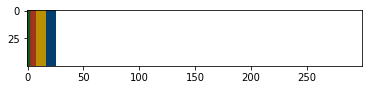

In [108]:
# Load image
src_image = img_final.copy()
src_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)
reshape_img = src_image.reshape((src_image.shape[0] * src_image.shape[1], 3))

# Display dominant colors Present in the image
KM_cluster = KMeans(n_clusters=5).fit(reshape_img)
visualize_color = visualize_Dominant_colors(KM_cluster, KM_cluster.cluster_centers_)

plt.imshow(visualize_color)

## III.Total Area of Peanut in Pixels <a class="anchor" id="sec6"></a>

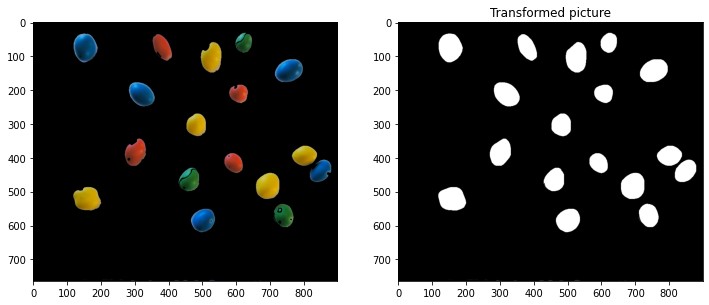

In [109]:
display(img_r,img_mask_w)

In [134]:
# Check the image matrix data type (could know the bit depth of the image)
print(img_mask_w.dtype)

#It returns a tuple of the number of rows, columns, and channels 
print(img_mask_w.shape)

# Check the height of image 
print(img_mask_w.shape[0])

# Check the width of image 
print(img_mask_w.shape[1])

# Check the number of channels of the image
print(img_mask_w.shape[2])


#Total number of pixels is accessed by img.size:
print( img_mask_w.size )

uint8
(764, 900, 3)
764
900
3
2062800


In [135]:
def count_area_pixels(img_in):
    
    img=img_in.copy()
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # counting the number of pixels
    number_of_white_pix = np.sum(img == 255)
    number_of_black_pix = np.sum(img == 0)
    number_of_color_pix = np.sum([np.where((img > 0) & (img < 255))])
    number_of_total_pix = np.sum(img)
    
    # Example 2: Use numpy.where() multiple conditions with the & operator
#arr2 = arr[np.where((arr >5) & (arr 5) | (arr % 5 == 0))]

    print('Number of white pixels:', number_of_white_pix)
    print('Number of black pixels:', number_of_black_pix)
    print('Number of colored pixels:', number_of_color_pix)
    print('Number of Total pixels:', number_of_total_pix)
    

In [137]:
count_area_pixels(img_mask_w)

Number of white pixels: 59679
Number of black pixels: 627685
Number of colored pixels: 268443
Number of Total pixels: 15230154


In [138]:
count_area_pixels(img_final)

Number of white pixels: 627342
Number of black pixels: 0
Number of colored pixels: 49956629
Number of Total pixels: 165285488


## IV. Shape of Area in milimeters and group by color <a class="anchor" id="sec7"></a>